In [44]:
import numpy as np 
import pandas as pd 
import math
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.model_selection import RandomizedSearchCV

In [45]:
df= pd.read_csv(r'D:/WQD7005 Group Project/Data.csv')

In [46]:
#Check on the data shape
df.shape

(8523, 12)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [48]:
df.columns.unique()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [49]:
#Check for unique values in each column
print(df['Item_Fat_Content'].unique())
print(df['Item_Type'].unique())
print(df['Outlet_Establishment_Year'].sort_values().unique())
print(df['Outlet_Size'].unique())
print(df['Outlet_Location_Type'].unique())
print(df['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[1985 1987 1997 1998 1999 2002 2004 2007 2009]
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [50]:
#As displayed, there are some repeated unique column with different label in Item Fat Content, thus we will standardized the label.\
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg', 'Regular')

In [51]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [52]:
#Find out the continuos variables and their mathematical value.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [53]:
#Check for duplicate values
df.duplicated().sum()

0

In [54]:
#Check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

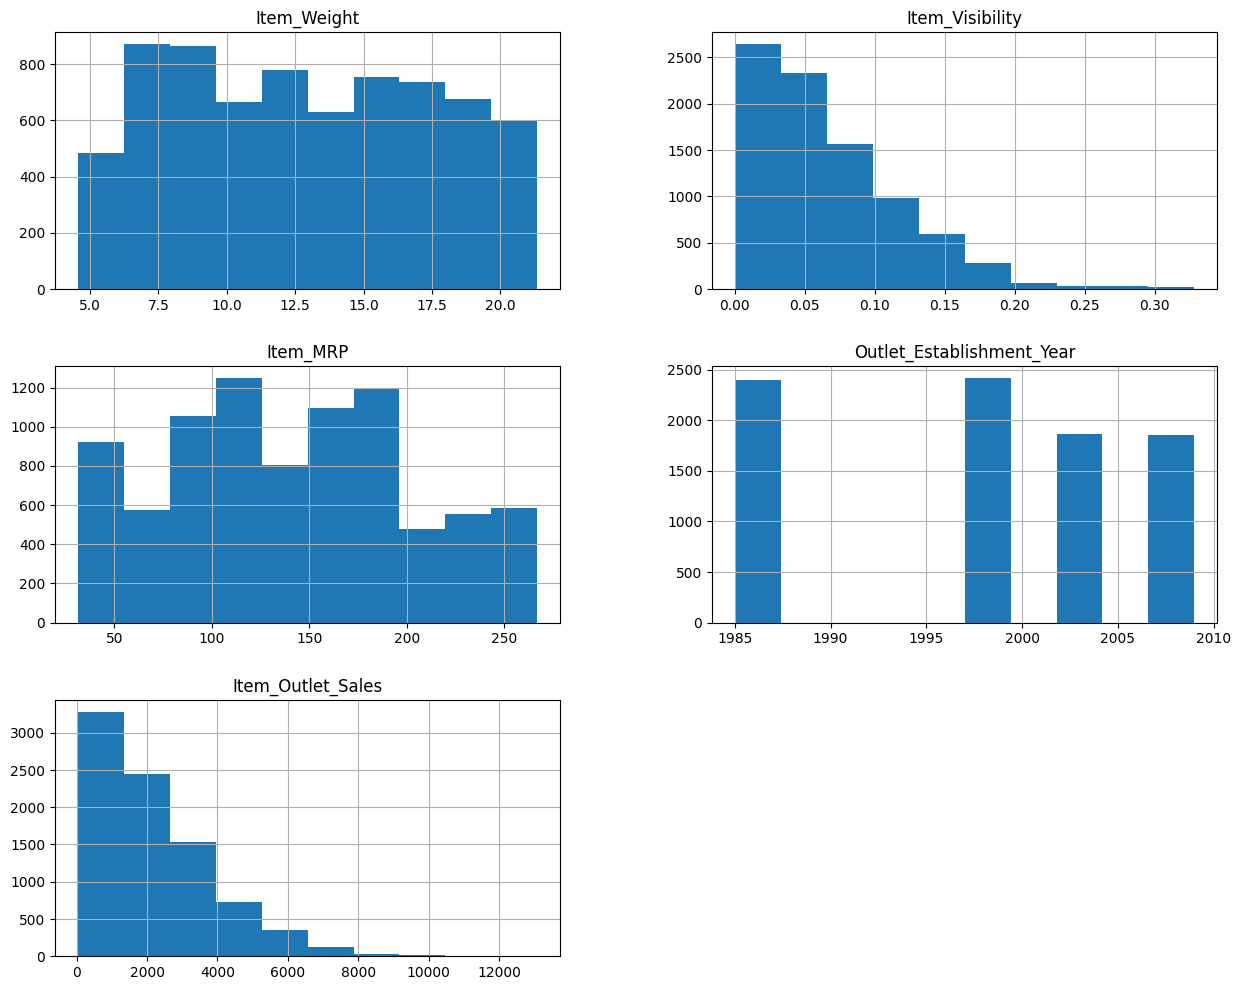

In [55]:
#To check the distribution of the data by plotting the histogram.
df.hist(figsize=(15,12))

In [56]:
#Impute for the missing value.
#As seen in the histogram, the distribution of the Item_Weight is considered as uniform distribution.
#Thus, it will be imputed using the mode.
df["Item_Weight"].fillna(df["Item_Weight"].mode(),inplace=True)
#For Outlet_size, this is actually a categorical variable. Thus, it will be imputed using the mode.
df["Outlet_Size"].fillna(df["Outlet_Size"].mode(),inplace=True)

EXPLORATORY DATA ANALYSIS (EDA)

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

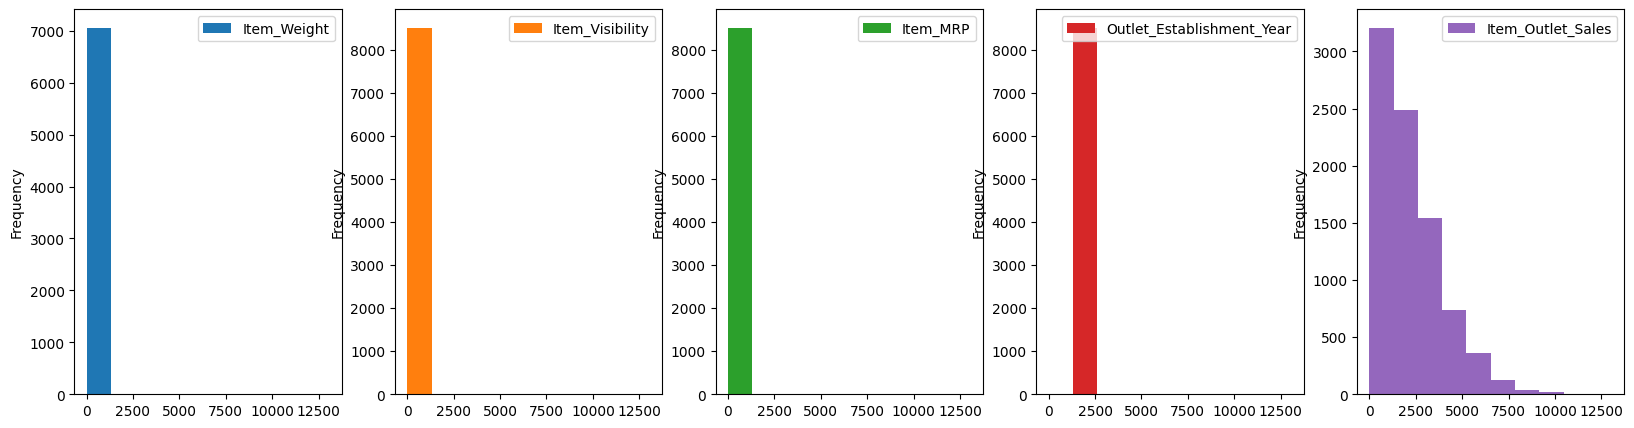

In [57]:
#Univariate Analysis (Categorical Variable)
df.plot(kind='hist', subplots=True, layout=(1,5), figsize=(20,5))

<Axes: >

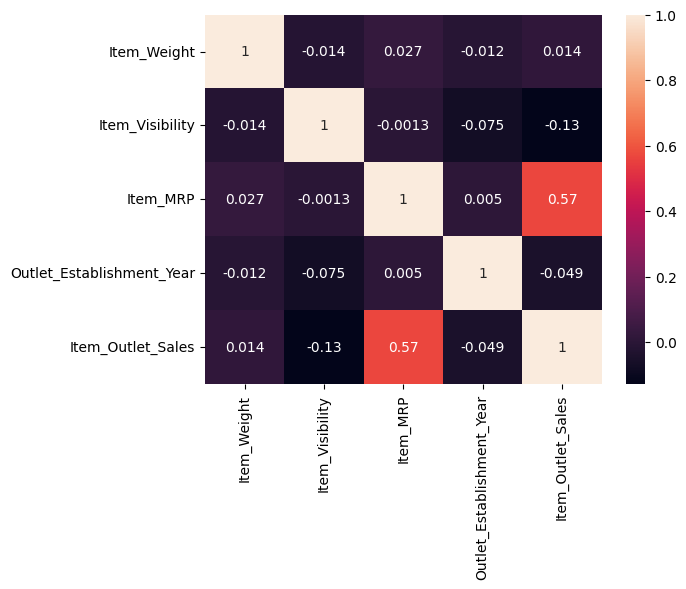

In [58]:
#Bivariate Analysis
#Correlation Heatmap for numerical variable only
df_corr= df.drop(columns=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
import seaborn as sns
df_corr=df_corr.corr()
sns.heatmap(df_corr, annot=True)

Visualizing Quantitative Data Spread W.R.T  Item_Outlet_Sales


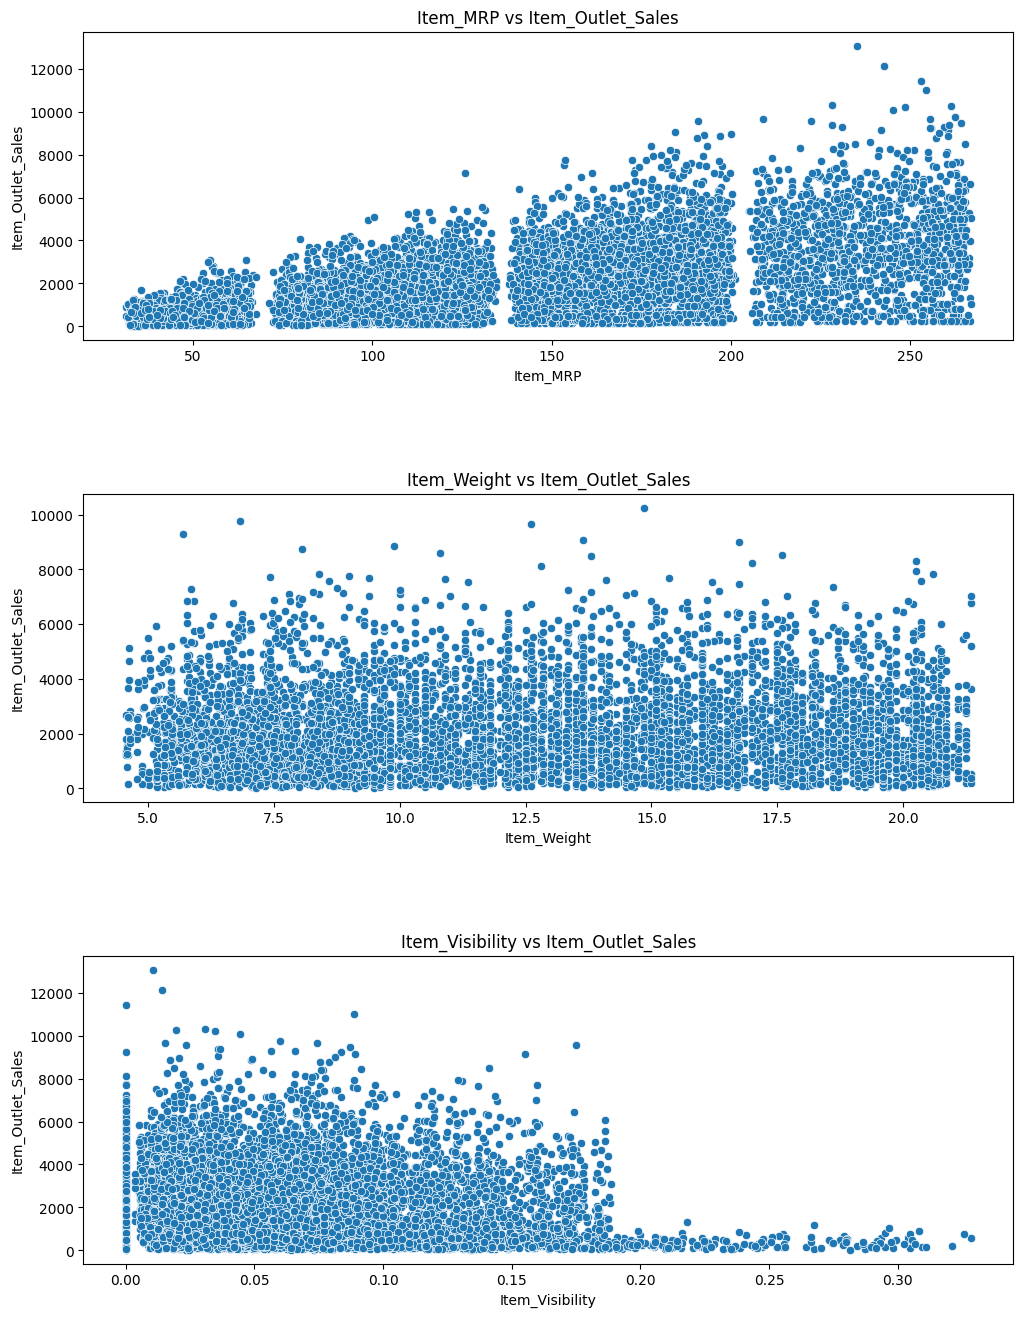

In [59]:
#Bivariate Analysis
#Scatterplot
fig, axes = plt.subplots(3, 1, figsize=(12,16))
Y_Variables="Item_Outlet_Sales"
X_Variables = ["Item_MRP", "Item_Weight", "Item_Visibility",]
print(f"Visualizing Quantitative Data Spread W.R.T  {Y_Variables}")
for i, label in enumerate(X_Variables):
    ax = sns.scatterplot(data=df, x=label, y=Y_Variables, ax=axes[i])
    ax.set_xlabel(label)
    ax.set_ylabel(f"{Y_Variables}")
    ax.set_title(f"{label} vs {Y_Variables}")
plt.subplots_adjust(hspace=0.5)

plt.show()

Boxplot in order to check on the outliers


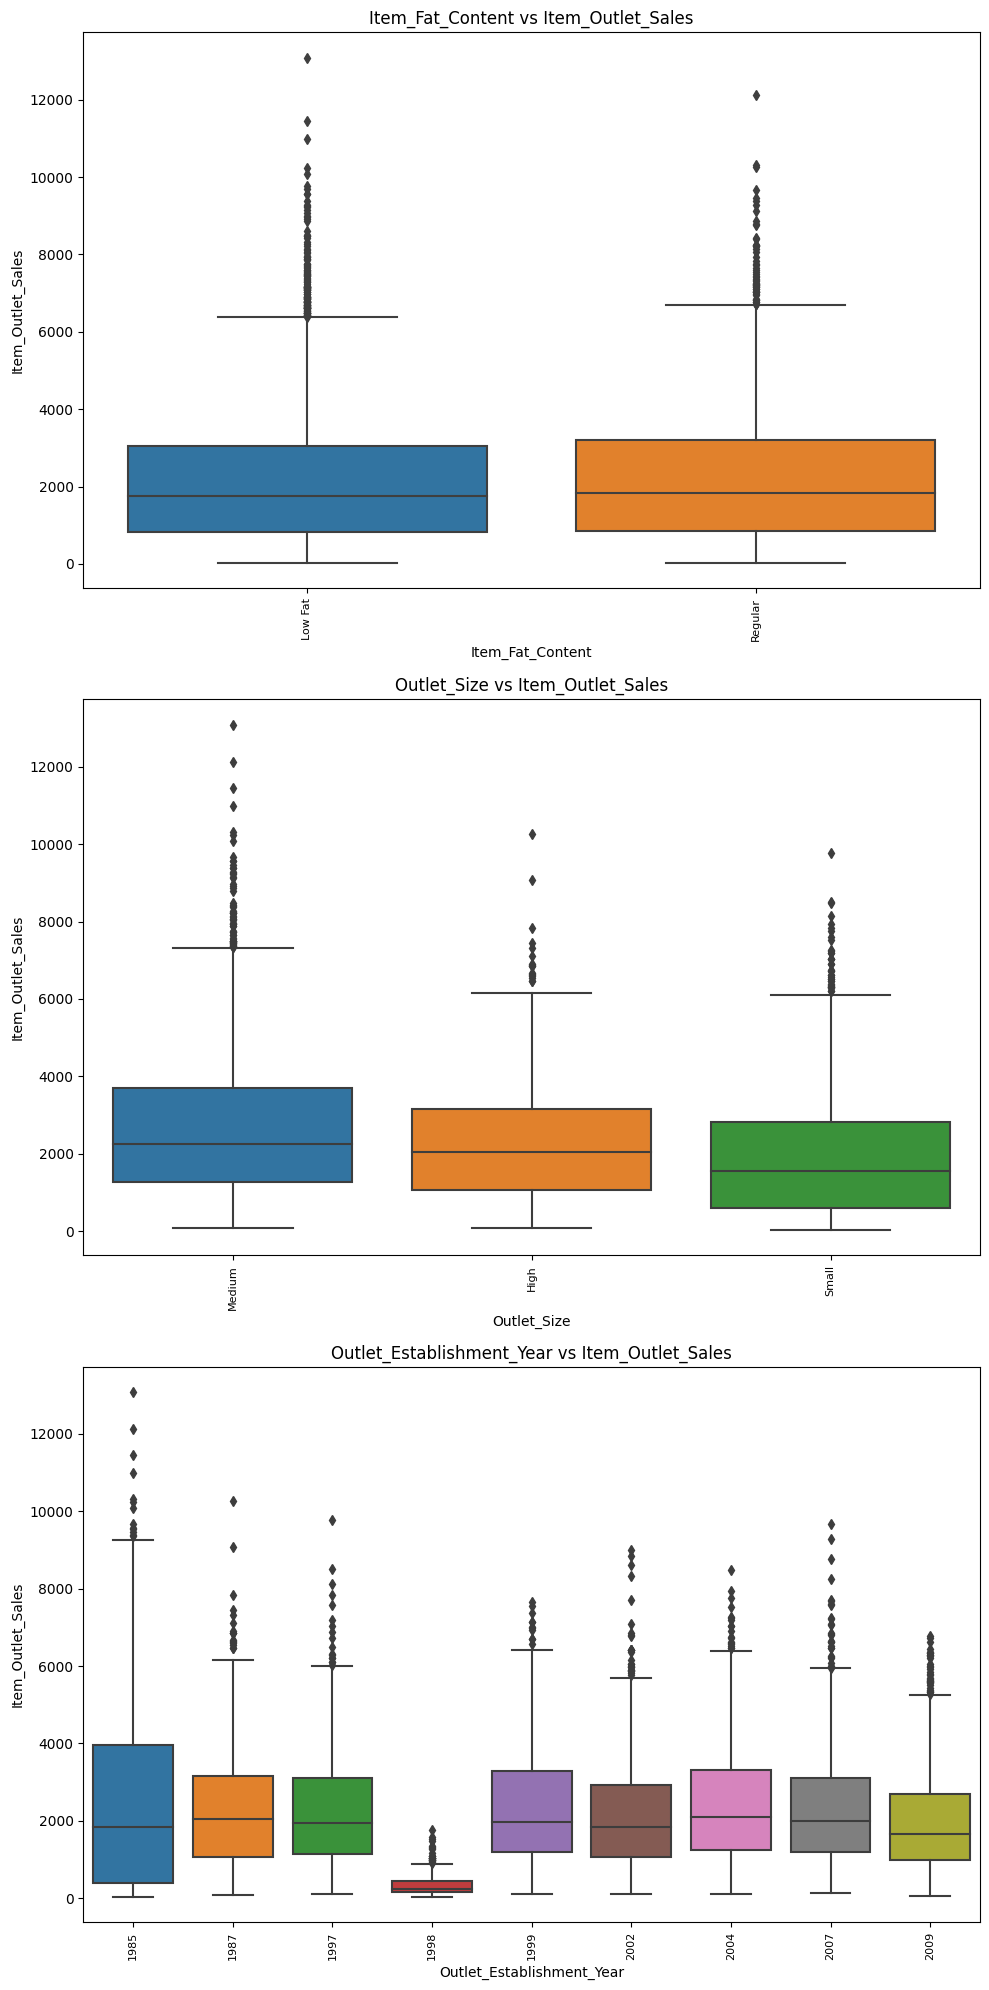

In [60]:
#Boxplot to check the outliers
fig, axes = plt.subplots(3, 1, figsize=(10, 20))
target="Item_Outlet_Sales"
columns = ["Item_Fat_Content", "Outlet_Size", "Outlet_Establishment_Year"]
print(f"Boxplot in order to check on the outliers")
for i, label in enumerate(columns):
    ax = sns.boxplot(data=df, x=label, y=target, ax=axes[i])
    ax.set_xlabel(label)
    ax.set_ylabel(f"{target}")
    ax.set_title(f"{label} vs {target}")
    ax.tick_params(axis='x',rotation=90, labelsize=8)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

DATA TRANSFORMATION

In [61]:
#Data Transformation
print(df['Item_Identifier'].value_counts())
print(df['Outlet_Identifier'].value_counts())

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64


In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [63]:
#Encode the categorical feature
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Establishment_Year']=le.fit_transform(df['Outlet_Establishment_Year'])
df['Outlet_Establishment_Year']=le.fit_transform(df['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,3,3,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1,0,2,1,994.7052


DATA MODELLING

In [65]:
Y = df['Item_Outlet_Sales']
X = df.drop(['Item_Outlet_Sales'], axis = 1)

In [70]:
#Let's try without perform scaling first.
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def predict_sales(df, features, target):
    results = {}
    
    for split_ratio in [0.6, 0.7, 0.8]:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1-split_ratio, random_state=42)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        
        results[f'Train-Test Split {split_ratio}'] = {
            'Model': model,
            'MSE': mse,
            'Coefficients': model.coef_,
            'Intercept': model.intercept_
        }
        
        print(f"Results for Train-Test Split Ratio {split_ratio}:")
        print(f"MSE: {mse}")
        print(f"Coefficients: {model.coef_}")
        print(f"Intercept: {model.intercept_}")
        print()
    
    return 

print(predict_sales)

<function predict_sales at 0x0000019FF2556980>
